# Summary For CareerVilage 

# Hypothesis
1. With the "answers of professional data", we can predict the "industry and headline" of professional
2. This problem is a Multi-Labeled Classification"

# Work Flow
1. Preprocess Professionals' data into categories. 


2. Extract only nouns from Answers' text.


3. **Making Model 1 : Answers' Keyword** <br/>
1) Mapping Answer's author_id and professinals_id <br/>
2) target columns: the categories of Professionals' (1) <br/>
3) input data: Answers' text. (2) <br/>


4. Estimate the NA values of professinals' industry and headline with a predictive model. <br/>
1) (NA Values Handling → Softmax (Classifier)


5. Extract keywords by combining Quests + tags & Extract only nouns from Questions' text.


6. **Making Model 2 : Classify Professionals' Keyword** <br/>
1) target columns: the industry and headline of Professionals' (4) <br/>
2) input data: Questions' text (5) <br/>


# Expected Result
- Data → Model 1 → Model 2 → Output(Result)

# Proposal

1. Add entries so that people can select the Professionals' Industry and Headline within the pre-treated category.


2. Floating tags to top10 so that people can be automatically viewed when you click them on a webpage


3. Checking the relationship between Professional and Student Offline Matching (Direction of Development)<br/>
1) In the future, allowing students in the same position as professional to match offline will help them more in their careers and career choices.

### Contents
1. [Data Load](#dataload)
2. [EDA](#eda)
3. [Analyze](#analyze)
4. [Analyze2](#analyze2)

### 1.  <a id="dataload"> Data Load </a>

In [94]:
import pandas as pd
import numpy as np
import os
from os import chdir
import sys
import re 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [4]:
answers = pd.read_csv('answers.csv')
comments = pd.read_csv('comments.csv')
emails = pd.read_csv("emails.csv")
group_memberships = pd.read_csv('group_memberships.csv')
groups = pd.read_csv('groups.csv')
matches = pd.read_csv('matches.csv')
professionals = pd.read_csv("professionals.csv")
questions = pd.read_csv('questions.csv')
school_memberships = pd.read_csv('school_memberships.csv')
students = pd.read_csv('students.csv')
tag_questions = pd.read_csv("tag_questions.csv")
tag_users = pd.read_csv('tag_users.csv')
tags = pd.read_csv('tags.csv')

## 2. <a id="eda"> EDA </a>

### 2-1. Answers

In [37]:
answers.head()

answers_id                 answers_author_id  \
0  4e5f01128cae4f6d8fd697cec5dca60c  36ff3b3666df400f956f8335cf53e09e   
1  ada720538c014e9b8a6dceed09385ee3  2aa47af241bf42a4b874c453f0381bd4   
2  eaa66ef919bc408ab5296237440e323f  cbd8f30613a849bf918aed5c010340be   
3  1a6b3749d391486c9e371fbd1e605014  7e72a630c303442ba92ff00e8ea451df   
4  5229c514000446d582050f89ebd4e184  17802d94699140b0a0d2995f30c034c6   

                answers_question_id            answers_date_added  \
0  332a511f1569444485cf7a7a556a5e54  2016-04-29 19:40:14 UTC+0000   
1  eb80205482e4424cad8f16bc25aa2d9c  2018-05-01 14:19:08 UTC+0000   
2  eb80205482e4424cad8f16bc25aa2d9c  2018-05-02 02:41:02 UTC+0000   
3  4ec31632938a40b98909416bdd0decff  2017-05-10 19:00:47 UTC+0000   
4  2f6a9a99d9b24e5baa50d40d0ba50a75  2017-10-13 22:07:33 UTC+0000   

                                        answers_body  
0  <p>Hi!</p>\n<p>You are asking a very interesti...  
1  <p>Hi. I joined the Army after I attended coll...  
2  <p>Dear Priyanka,</p><p>Greetings! I have answ...  
3  <p>I work for a global company who values high...  
4  I agree with Denise. Every single job I've had...

In [39]:
answers.answers_body[1] 

"<p>Hi. I joined the Army after I attended college and received a Bachelor's Degree in Criminal Justice.  Commissioned officers enter the Military with a four year degree or receive officer training after joining and complete a tour. You can prepare yourself by taking Reserve Officer Training Corps (ROTC) while in high school or a university. You can also attend Officer Candidate School (OCS) after graduating from college or become commissioned by earning a professional degree. If you decide to earn a degree, think about what you would like to do while in the military.  The experience in the military was very rewarding. I wish you well and much success in your future. </p>"

In [11]:
answers.describe()

answers_id                 answers_author_id  \
count                              51123                             51123   
unique                             51123                             10169   
top     ab0e04a3d71e4e6f8ef0b97a1eb8d26a  36ff3b3666df400f956f8335cf53e09e   
freq                                   1                              1710   

                     answers_question_id            answers_date_added  \
count                              51123                         51123   
unique                             23110                         51062   
top     8eb6ba7af57846acbfec5633e537192a  2016-10-13 00:52:24 UTC+0000   
freq                                  58                             2   

                                             answers_body  
count                                               51122  
unique                                              50401  
top     <p>&lt;span style="background-color: transpare...  
freq                                                  103

- 51122 answers

- The unique value of answerers_author_id has been reduced by one-fifth, and experts have responded several times.

- We should hash out the author's keywords in the text of the people who answered.

##### If the hashtag enters a new question, it will be necessary to connect it to an expert who answered a lot of the hashtags.


### 2-2. Comments

In [12]:
comments.head()

comments_id                comments_author_id  \
0  f30250d3c2ca489db1afa9b95d481e08  9fc88a7c3323466dbb35798264c7d497   
1  ca9bfc4ba9464ea383a8b080301ad72c  de2415064b9b445c8717425ed70fd99a   
2  c354f6e33956499aa8b03798a60e9386  6ed20605002a42b0b8e3d6ac97c50c7f   
3  73a6223948714c5da6231937157e4cb7  d02f6d9faac24997a7003a59e5f34bd3   
4  55a89a9061d44dd19569c45f90a22779  e78f75c543e84e1c94da1801d8560f65   

         comments_parent_content_id           comments_date_added  \
0  b476f9c6d9cd4c50a7bacdd90edd015a  2019-01-31 23:39:40 UTC+0000   
1  ef4b6ae24d1f4c3b977731e8189c7fd7  2019-01-31 20:30:47 UTC+0000   
2  ca7a9d7a95df471c816db82ee758f57d  2019-01-31 18:44:04 UTC+0000   
3  c7a88aa76f5f49b0830bfeb46ba17e4d  2019-01-31 17:53:28 UTC+0000   
4  c7a88aa76f5f49b0830bfeb46ba17e4d  2019-01-31 14:51:53 UTC+0000   

                                       comments_body  
0  First, you speak to recruiters. They are train...  
1  Most large universities offer study abroad pro...  
2  First, I want to put you at ease that the oppo...  
3  Your question submission was great! I just wan...  
4  Thank you. I'm new to this site. I'm sorry if ...

In [40]:
comments.comments_body[1]

"Most large universities offer study abroad programs.  The study abroad programs are found on the schools website.  You may have to click into the Undergraduate or Graduate links.   I also recommend reaching out to the university counselors.  The have wealth of information and details that may not be on the website. \r\n\r\nMy son will be studying in France and Sweden next year through DePaul University.   The University of Southern California has a very strong international program in which most students participate.  It's a great opportunity to learn the culture of other countries while in school."

In [13]:
comments.describe()

comments_id                comments_author_id  \
count                              14966                             14966   
unique                             14966                              4231   
top     09fad9fdb89b4b7493e9328513ee279c  36ff3b3666df400f956f8335cf53e09e   
freq                                   1                               317   

              comments_parent_content_id           comments_date_added  \
count                              14966                         14966   
unique                              9923                         14905   
top     4c6ae4bd2136472899c15b798eb9d3df  2016-07-22 22:13:05 UTC+0000   
freq                                  30                             3   

       comments_body  
count          14962  
unique         11963  
top       Thank you!  
freq             388

### 2-3. Emails

In [14]:
emails.head()

emails_id               emails_recipient_id              emails_date_sent  \
0    2337714  0c673e046d824ec0ad0ebe012a0673e4  2018-12-07 01:05:40 UTC+0000   
1    2336077  0c673e046d824ec0ad0ebe012a0673e4  2018-12-06 01:14:15 UTC+0000   
2    2314660  0c673e046d824ec0ad0ebe012a0673e4  2018-11-17 00:38:27 UTC+0000   
3    2312639  0c673e046d824ec0ad0ebe012a0673e4  2018-11-16 00:32:19 UTC+0000   
4    2299700  0c673e046d824ec0ad0ebe012a0673e4  2018-11-08 00:16:40 UTC+0000   

     emails_frequency_level  
0  email_notification_daily  
1  email_notification_daily  
2  email_notification_daily  
3  email_notification_daily  
4  email_notification_daily

In [15]:
emails.describe() 

emails_id
count  1.850101e+06
mean   1.362206e+06
std    6.449917e+05
min    1.060000e+02
25%    8.813900e+05
50%    1.400010e+06
75%    1.911846e+06
max    2.409829e+06

### 2-4. Group_memberships

In [16]:
group_memberships.head()

group_memberships_group_id         group_memberships_user_id
0  eabbdf4029734c848a9da20779637d03  9a5aead62c344207b2624dba90985dc5
1  eabbdf4029734c848a9da20779637d03  ea7122da1c7b4244a2184a4f9f944053
2  eabbdf4029734c848a9da20779637d03  cba603f34acb4a40b3ccb53fe6681b5d
3  eabbdf4029734c848a9da20779637d03  fa9a126e63714641ae0145557a390cab
4  eabbdf4029734c848a9da20779637d03  299da113c5d1420ab525106c242c9429

In [17]:
group_memberships.describe()

group_memberships_group_id         group_memberships_user_id
count                               1038                              1038
unique                                46                               727
top     f16d593910bf443598839021bbe97128  b0f6c44506444fb99e910dcc5836b5d8
freq                                 117                                14

### 2-5. Groups

In [18]:
groups.head()

groups_id groups_group_type
0  eabbdf4029734c848a9da20779637d03     youth program
1  7080bf8dcf78463bb03e6863887fd715     youth program
2  bc6fc50a2b444efc8ec47111b290ffb8     youth program
3  37f002e8d5e442ca8e36e972eaa55882     youth program
4  52419ff84d4b47bebd0b0a6c1263c296     youth program

In [43]:
groups.groups_group_type.unique() 

array(['youth program', 'cause', 'professional network', 'club',
       'competition', 'mentorship program', 'interest group'],
      dtype=object)

In [19]:
groups.describe()

groups_id groups_group_type
count                                 49                49
unique                                49                 7
top     2db32f76e5524d57ace1012aa9fe1125     youth program
freq                                   1                33

##### It seems that group_type is determined through a specific program. See if there is a connection between groups

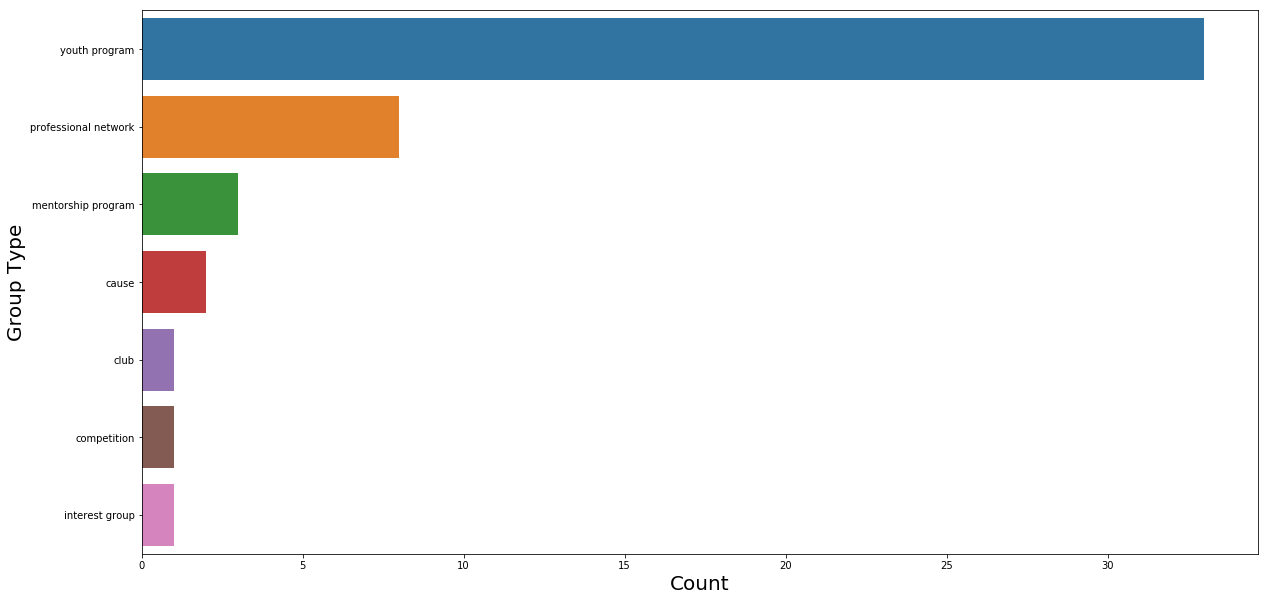

In [20]:
sorted_groups = groups['groups_group_type'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(sorted_groups.values,sorted_groups.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Group Type", fontsize=20)
plt.show()

### 2-6. Matches

In [20]:
matches.head()

matches_email_id               matches_question_id
0           1721939  332a511f1569444485cf7a7a556a5e54
1           1665388  332a511f1569444485cf7a7a556a5e54
2           1636634  332a511f1569444485cf7a7a556a5e54
3           1635498  332a511f1569444485cf7a7a556a5e54
4           1620298  332a511f1569444485cf7a7a556a5e54

In [21]:
matches.describe()

matches_email_id
count      4.316275e+06
mean       1.478192e+06
std        5.895280e+05
min        1.060000e+02
25%        1.011924e+06
50%        1.544656e+06
75%        1.970642e+06
max        2.409829e+06

### 2-7. Professionals

In [22]:
professionals.head()

professionals_id professionals_location  \
0  9ced4ce7519049c0944147afb75a8ce3                    NaN   
1  f718dcf6d2ec4cb0a52a9db59d7f9e67                    NaN   
2  0c673e046d824ec0ad0ebe012a0673e4     New York, New York   
3  977428d851b24183b223be0eb8619a8c  Boston, Massachusetts   
4  e2d57e5041a44f489288397c9904c2b2                    NaN   

  professionals_industry professionals_headline     professionals_date_joined  
0                    NaN                    NaN  2011-10-05 20:35:19 UTC+0000  
1                    NaN                    NaN  2011-10-05 20:49:21 UTC+0000  
2                    NaN                    NaN  2011-10-18 17:31:26 UTC+0000  
3                    NaN                    NaN  2011-11-09 20:39:29 UTC+0000  
4                    NaN                    NaN  2011-12-10 22:14:44 UTC+0000

In [51]:
print('location:', professionals.professionals_location.unique())

print('Industry:', professionals.professionals_industry.unique())

location: [nan 'New York, New York' 'Boston, Massachusetts' ...
 'Kingston, Washington' 'Berwyn, Illinois' 'Woodland, California']
Industry: [nan 'Special Events' 'education, tech, media' ... 'Dev Sec Ops'
 'Electrical engineering Computer Software' 'Mobility and Entertainment']


In [23]:
professionals.describe()

professionals_id professionals_location  \
count                              28152                  25054   
unique                             28152                   2582   
top     668311ec0dbb4c1db6d5d8fb4e3d7e7e     New York, New York   
freq                                   1                   1337   

       professionals_industry professionals_headline  \
count                   25576                  26085   
unique                   2470                  22272   
top        Telecommunications                     --   
freq                     3166                    325   

           professionals_date_joined  
count                          28152  
unique                         28000  
top     2011-12-26 05:00:00 UTC+0000  
freq                              45

- Primary classification can be performed with hashtags of questions according to the location/industry of experts
- Location: It's the United States, it's divided into 52 states.
- Industry: Therefore it seems necessary to classify into section categories (manufacturing/communication/services etc.)

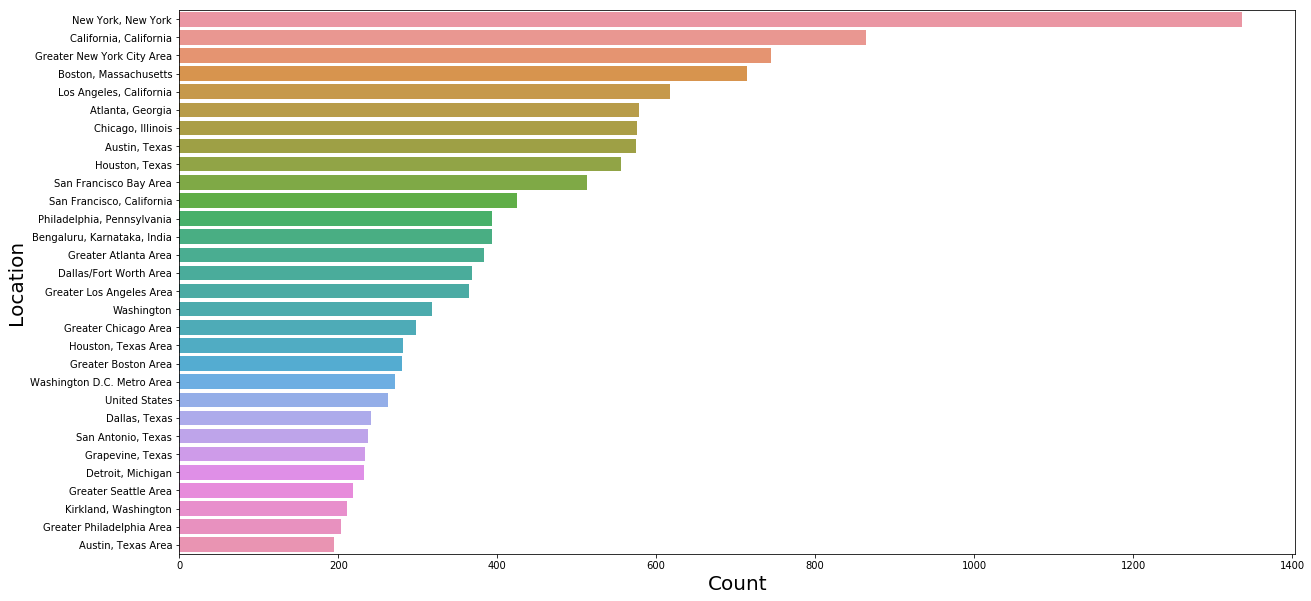

In [24]:
professionals_locations = professionals['professionals_location'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(professionals_locations.values, professionals_locations.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Location", fontsize=20)
plt.show()

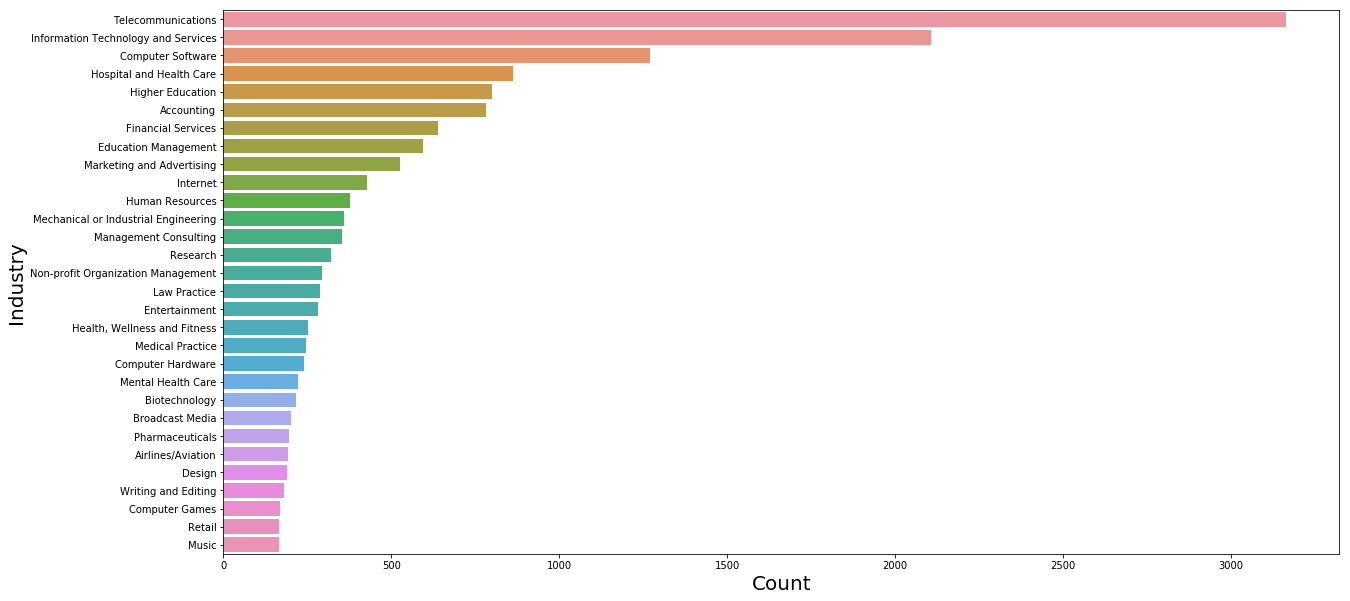

In [26]:
professionals_industries = professionals['professionals_industry'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(professionals_industries.values, professionals_industries.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Industry", fontsize=20)
plt.show()

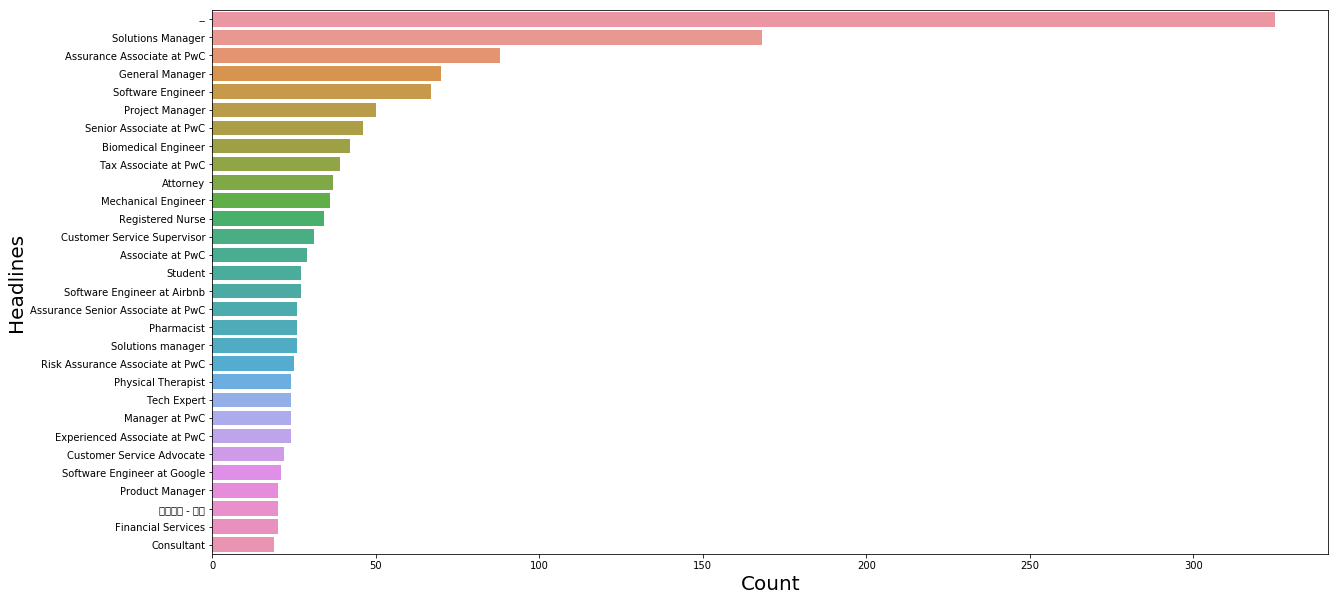

In [27]:
professionals_headlines = professionals['professionals_headline'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(professionals_headlines.values, professionals_headlines.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Headlines", fontsize=20)
plt.show()

### 2-8. Questions

In [24]:
questions.head()

questions_id               questions_author_id  \
0  332a511f1569444485cf7a7a556a5e54  8f6f374ffd834d258ab69d376dd998f5   
1  eb80205482e4424cad8f16bc25aa2d9c  acccbda28edd4362ab03fb8b6fd2d67b   
2  4ec31632938a40b98909416bdd0decff  f2c179a563024ccc927399ce529094b5   
3  2f6a9a99d9b24e5baa50d40d0ba50a75  2c30ffba444e40eabb4583b55233a5a4   
4  5af8880460c141dbb02971a1a8369529  aa9eb1a2ab184ebbb00dc01ab663428a   

           questions_date_added  \
0  2016-04-26 11:14:26 UTC+0000   
1  2016-05-20 16:48:25 UTC+0000   
2  2017-02-08 19:13:38 UTC+0000   
3  2017-09-01 14:05:32 UTC+0000   
4  2017-09-01 02:36:54 UTC+0000   

                                     questions_title  \
0                        Teacher   career   question   
1  I want to become an army officer. What can I d...   
2  Will going abroad for your first job increase ...   
3  To become a specialist in business  management...   
4  Are there any scholarships out there for stude...   

                                      questions_body  
0  What  is  a  maths  teacher?   what  is  a  ma...  
1  I am Priyanka from Bangalore . Now am in 10th ...  
2  I'm planning on going abroad for my first job....  
3  i hear business management is a hard way to ge...  
4  I'm trying to find scholarships for first year...

In [25]:
questions.describe()

questions_id               questions_author_id  \
count                              23931                             23931   
unique                             23931                             12329   
top     f74840697f3644009d22950d9165cafe  2fe767de78fa4dfd83f0021cf7712064   
freq                                   1                                93   

                questions_date_added                  questions_title  \
count                          23931                            23931   
unique                         23869                            23739   
top     2016-05-17 22:14:06 UTC+0000  How do I become an IAS officer?   
freq                               2                                6   

                                           questions_body  
count                                               23931  
unique                                              23681  
top     Accounting student at Towson university  #acco...  
freq                                                   16

### 2-9. School_memberships

In [26]:
school_memberships.head()

school_memberships_school_id        school_memberships_user_id
0                        197406  23dce13ca6164a73aec7a3cd56a4884d
1                        197398  23dce13ca6164a73aec7a3cd56a4884d
2                        199821  23dce13ca6164a73aec7a3cd56a4884d
3                        186239  9c5803ae43ca4cf6b27ea85871625116
4                        182063  9c5803ae43ca4cf6b27ea85871625116

In [27]:
school_memberships.describe()

school_memberships_school_id
count                   5638.000000
mean                  167256.254346
std                    47588.724813
min                    69421.000000
25%                   125573.500000
50%                   196934.000000
75%                   198771.000000
max                   214607.000000

### 2-10. Students

In [28]:
students.head()

students_id students_location  \
0  12a89e96755a4dba83ff03e03043d9c0               NaN   
1  e37a5990fe354c60be5e87376b08d5e3               NaN   
2  12b402cceeda43dcb6e12ef9f2d221ea               NaN   
3  a0f431fc79794edcb104f68ce55ab897               NaN   
4  23aea4702d804bd88d1e9fb28074a1b4               NaN   

           students_date_joined  
0  2011-12-16 14:19:24 UTC+0000  
1  2011-12-27 03:02:44 UTC+0000  
2  2012-01-01 05:00:00 UTC+0000  
3  2012-01-01 05:00:00 UTC+0000  
4  2012-01-01 05:00:00 UTC+0000

In [29]:
students.describe()

students_id   students_location  \
count                              30971               28938   
unique                             30971                5480   
top     1027121e74a84df4ae63113d1c0c84a2  New York, New York   
freq                                   1                1313   

                students_date_joined  
count                          30971  
unique                         29736  
top     2013-11-22 05:00:00 UTC+0000  
freq                             246

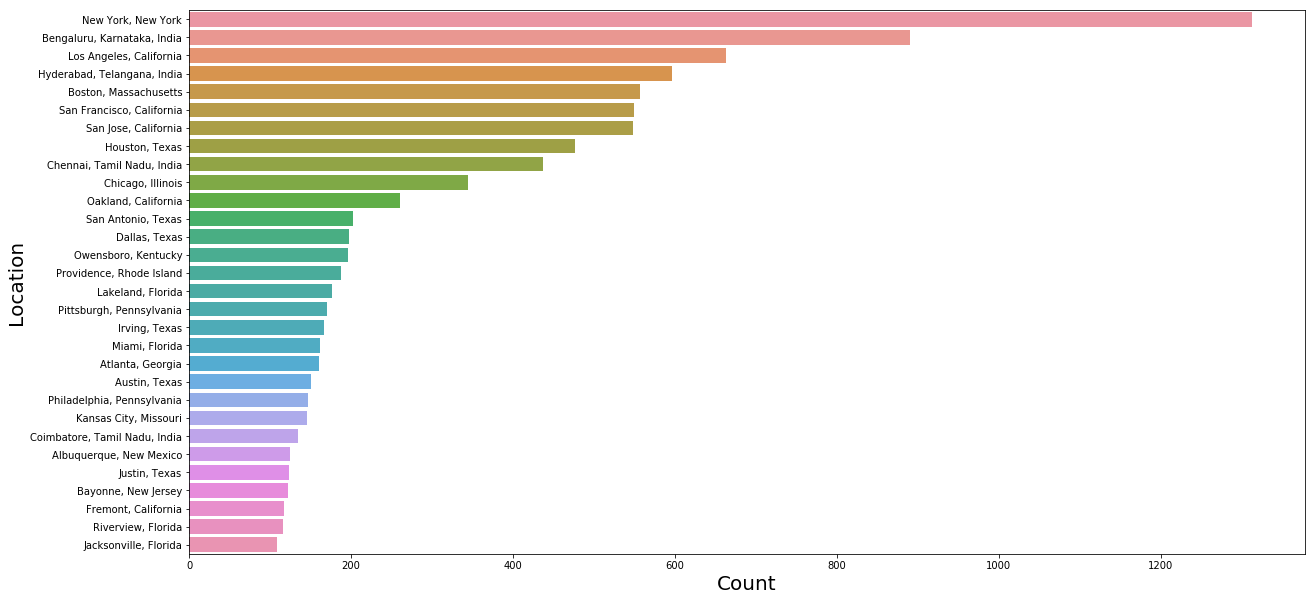

In [28]:
students_locations = students['students_location'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(students_locations.values, students_locations.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Location", fontsize=20)
plt.show()

### 2-11. Tag_questions

In [30]:
tag_questions.head()

tag_questions_tag_id         tag_questions_question_id
0                 28930  cb43ebee01364c68ac61d347a393ae39
1                 28930  47f55e85ce944242a5a347ab85a8ffb4
2                 28930  ccc30a033a0f4dfdb2eb987012f25792
3                 28930  e30b274e48d741f7bf50eb5e7171a3c0
4                 28930  3d22742052df4989b311b4195cbb0f1a

In [31]:
tag_questions.describe()

tag_questions_tag_id
count          76553.000000
mean           17289.690763
std            10308.915329
min               27.000000
25%            11165.000000
50%            18360.000000
75%            26420.000000
max            39250.000000

### 2-12. Tag_users

In [32]:
tag_users.head()

tag_users_tag_id                 tag_users_user_id
0               593  c72ab38e073246e88da7e9a4ec7a4472
1              1642  8db519781ec24f2e8bdc67c2ac53f614
2               638  042d2184ee3e4e548fc3589baaa69caf
3             11093  c660bd0dc1b34224be78a58aa5a84a63
4             21539  8ce1dca4e94240239e4385ed22ef43ce

In [33]:
tag_users.describe()

tag_users_tag_id
count     136663.000000
mean       18971.528629
std         9018.442845
min           27.000000
25%        18065.000000
50%        18807.000000
75%        24132.000000
max        39261.000000

### 2-13. Tags

In [34]:
tags.head()

tags_tag_id      tags_tag_name
0        27490            college
1          461   computer-science
2          593  computer-software
3        27292           business
4        18217             doctor

In [35]:
tags.describe()

tags_tag_id
count  16269.000000
mean   28511.686336
std     8421.414012
min       27.000000
25%    21711.000000
50%    31101.000000
75%    35207.000000
max    39276.000000

- Idea: Why don't you float the tags to top10 so that people can be automatically answered by clicking them on a webpage?

In [78]:
tag_n_user = pd.merge(tags, tag_users, left_on='tags_tag_id', right_on='tag_users_tag_id', how='outer')
tag_n_user.sort_values('tag_users_tag_id')[:10]

tags_tag_id tags_tag_name  tag_users_tag_id  \
32218           27      military              27.0   
32258           27      military              27.0   
32259           27      military              27.0   
32260           27      military              27.0   
32261           27      military              27.0   
32262           27      military              27.0   
32263           27      military              27.0   
32264           27      military              27.0   
32265           27      military              27.0   
32266           27      military              27.0   

                      tag_users_user_id  
32218  5f77e0a2c3a144dda336df2294a64530  
32258  d688cc76ef3a4174980754fcd059392a  
32259  36ddb593ca5742f29ed9b5ac66cf24a3  
32260  4d0793926fe345aa958d1796c9adf5fa  
32261  8963293a4dbe49619114a7cb7d76fa51  
32262  642c548196e74d579e54936c633101af  
32263  838988e992724d02a9130ea1b4749466  
32264  56bc0e6d30864d58be216510d0e0c259  
32265  6f2cc9f24a4a474a9adf385929abb592  
32266  37c5c800e3934118aac2e7b020029123

In [72]:
tag_n_user.count()

tags_tag_id          141021
tags_tag_name        141020
tag_users_tag_id     136663
tag_users_user_id    136663
dtype: int64

In [82]:
tag_n_questions = pd.merge(tags, tag_questions, left_on='tags_tag_id', right_on='tag_questions_tag_id', how='outer')
tag_n_questions.sort_values('tags_tag_id')[:10]

tags_tag_id tags_tag_name  tag_questions_tag_id  \
34749           27      military                  27.0   
34651           27      military                  27.0   
34652           27      military                  27.0   
34653           27      military                  27.0   
34654           27      military                  27.0   
34655           27      military                  27.0   
34656           27      military                  27.0   
34657           27      military                  27.0   
34658           27      military                  27.0   
34659           27      military                  27.0   

              tag_questions_question_id  
34749  27cb381eea0144b7bc9dc553a9ef41b6  
34651  7378c86f1e2e42cfa58e3b977a306b06  
34652  4c6d71aaf2724b9f8d439ae086d4f3da  
34653  3b566e9d713b49ada0c23883c084b4e4  
34654  99b90ab2a92d46dda9c332cc229ea4ba  
34655  50e98c8c356b4a7b9b70c5d04cf37d7d  
34656  3e9b474c11654285b3e935e8b9421402  
34657  5ba467d11ff34486a5b281d873450c49  
34658  e0cb5a52c3a14fba81e1ad2fefcb9299  
34659  03bed809e25e4b48982ba6e31ab3dabd

In [79]:
tag_n_questions.count()

tags_tag_id                  85731
tags_tag_name                85730
tag_questions_tag_id         76553
tag_questions_question_id    76553
dtype: int64

In [84]:
tag_n_questions[['tags_tag_name','tag_questions_question_id']]

tags_tag_name         tag_questions_question_id
0                 college  bfbf79503bfb48909b4e514c5675502e
1                 college  a4da117f4e3b45d49b83f7c3d6bc9915
2                 college  9b90fda0660e4b72936c17a642334929
3                 college  37a7d709c90445fc9643ada3933fbc6d
4                 college  bc854d4070dd474797ff5f0242f510f1
5                 college  b3f8dc8bb99b45c6a6898b7ea20daf6c
6                 college  2fceaae061a745728d59c858670ad095
7                 college  a13642cafac5475c8ba7012e13e06b28
8                 college  4c521ed278a3450b995d8218aeae2da9
9                 college  81fe26c0f4214d70b1c0875f3a4720a0
10                college  20a8e38f5e3142d1aa9a3c3534718fac
11                college  38440c5b75224645b988b50be1cbd0bf
12                college  e62cfa9ab3764abeb3230703f2011df2
13                college  1c092558b6224d2b99481e6a12138ae1
14                college  dbd75aaed81d4aa2aaa5c8445e79e365
15                college  5979b6e4c4844939bb0b4e0e6c2f42ef
16                college  cb66aea3578648ca8774454f7ba9091d
17                college  f6b587fc6e8d4f9bb085ec033dd35001
18                college  aef20004545f4e9f998beeffa79b30a7
19                college  e40a218130834645bd74a5a196cec9e7
20                college  6eb4a40c11df4fcc806a519a7953233a
21                college  6e4f9820deda446eb487f54511d01cd2
22                college  ef72bf1af81d49b59f826f1459663126
23                college  396ff062e9ab4e9d839dafe47e005935
24                college  c824aaaf558b43a69ae8ea53b83be813
25                college  a25c4cee64974799ba0c150e6afce95f
26                college  a7ca233bf96344f797b30563a6005cc6
27                college  3a88b3fa2d2e48d489728298c985b076
28                college  10c691d956e04110ade5fd3711339fdd
29                college  af843cd2412443bf8d08db1238dce801
...                   ...                               ...
85701               young                               NaN
85702         youngadults                               NaN
85703           #youngmom                               NaN
85704   young-profesional                               NaN
85705   youngprofessional                               NaN
85706  #youngprofessional                               NaN
85707              #youth                               NaN
85708        youthadvisor                               NaN
85709   youth-development                               NaN
85710    youth-employment  0bf2248575b842e482382311ad04dc7e
85711    youth-engagement                               NaN
85712        youth-pastor  acba8cba3f9a4540b940b435265a041c
85713      youth-programs                               NaN
85714      youth-services                               NaN
85715            #youtube                               NaN
85716                 yui                               NaN
85717              zambia                               NaN
85718    zdijhvgiuasbvmnv                               NaN
85719             zealand                               NaN
85720           zeitgeist                               NaN
85721              zillow                               NaN
85722                 zjz                               NaN
85723      zombie-killing                               NaN
85724                #zoo                               NaN
85725          zoo-keeper                               NaN
85726            #zoology                               NaN
85727                 zsh                               NaN
85728               zumba                               NaN
85729               zynga                               NaN
85730                  零售                               NaN

[85731 rows x 2 columns]

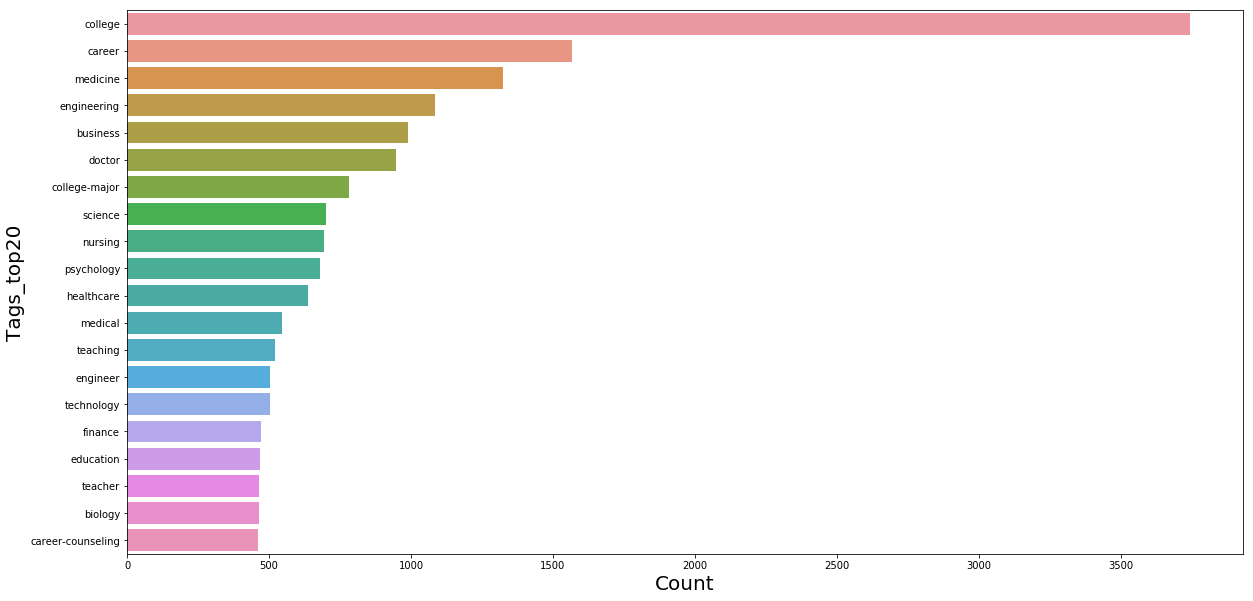

In [87]:
tags_top20 = tag_n_questions['tags_tag_name'].value_counts().head(20)
plt.figure(figsize=(20,10))
sns.barplot(tags_top20.values, tags_top20.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Tags_top20", fontsize=20)
plt.show()

### 3.  <a id="analyze"> Analyzing </a>

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import words

vectorizer = CountVectorizer(analyzer = 'word', 
                             lowercase = True,
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3),
                             vocabulary = set(words.words()), # nltk의 words를 사용하거나 문서 자체의 사전을 만들거나 선택한다. 
                             max_features = 90000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=90000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None,
        vocabulary={'ponticular', 'sniggering', 'Dorism', 'Ephesian', 'undesirability', 'aranein', 'faith', 'eliquation', 'fribbling', 'bilamellar', 'ass', 'flecnode', 'raviney', 'frustrate', 'azthionium', 'zoarial', 'hogherd', 'epithelial', 'farweltered', 'ouistiti', 'semifamine', 'sensationless', 'ungarte..., 'poppet', 'broiderer', 'miaul', 'passivist', 'unbailable', 'quadrupleness', 'friendliness', 'Kim'})

In [30]:
pipeline = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer(smooth_idf = False)),
])  
pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=90000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
       ...('tfidf', TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True))])

In [33]:
# 우선 answers를 보자
%time answer_train_tfidf_vector = pipeline.fit_transform(answers['answers_body'].values.astype('U'))  

C:\Users\lady1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1242: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


Wall time: 30.1 s


In [34]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

235892


['A',
 'Aani',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'Ababdeh']

In [36]:
import numpy as np
dist = np.sum(answer_train_tfidf_vector, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)

pd.DataFrame(dist, columns=vocab)

[[0. 0. 0. ... 0. 0. 0.]] A


A  Aani  Aaron  Aaronic  Aaronical  Aaronite  Aaronitic  Aaru   Ab  \
0  0.0   0.0    0.0      0.0        0.0       0.0        0.0   0.0  0.0   

   Ababdeh   ...    zymotechnical  zymotechnics  zymotechny  zymotic  \
0      0.0   ...              0.0           0.0         0.0      0.0   

   zymotically  zymotize  zymotoxic  zymurgy  zythem  zythum  
0          0.0       0.0        0.0      0.0     0.0     0.0  

[1 rows x 235892 columns]

In [5]:
#### from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
forest

NameError: name 'RandomForestClassifier' is not defined

### 4.  <a id="analyze2"> Analyze </a>

1. Preprocess Professionals' data into categories. 

2. Extract only nouns from Answers' text

In [55]:
# questions.questions_id = answers.answers_question_id

Q_n_A = pd.merge(questions[['questions_id','questions_title','questions_body']], answers[['answers_question_id','answers_id','answers_body']], left_on='questions_id', right_on='answers_question_id', how='outer')
Q_n_A.sort_values('questions_id')

# inner(Except NaN) : questions_id = (51123) 23931, answers_id = 51123
# outer(Include NaN) : questions_id = (51944) 23931, answers_id = 51123

questions_id  \
12793  0003e7bf48f24b5c985f8fce96e611f3   
12792  0003e7bf48f24b5c985f8fce96e611f3   
435    0006609dd4da40dcaa5a83e0499aba14   
434    0006609dd4da40dcaa5a83e0499aba14   
433    0006609dd4da40dcaa5a83e0499aba14   
46744  000af224bc2f4e94a19f8b62ba279cc4   
50679  000b30fb534b41f7b716fa9ebf9c3f35   
50680  000b30fb534b41f7b716fa9ebf9c3f35   
3601   0018752e44b44e26bb74a0a43232b4d6   
248    0025b917219c4a24ba5fe260ca66ca98   
5651   00269cdc24fd4a3c93aad485688c240b   
5652   00269cdc24fd4a3c93aad485688c240b   
18459  002b07f6281a407ca49ee8b3538e5e45   
18456  002b07f6281a407ca49ee8b3538e5e45   
18457  002b07f6281a407ca49ee8b3538e5e45   
18454  002b07f6281a407ca49ee8b3538e5e45   
18458  002b07f6281a407ca49ee8b3538e5e45   
18455  002b07f6281a407ca49ee8b3538e5e45   
34275  002c5689a0b642a3940f99b68f5364b6   
50335  0031077b31454fadae1754e871e84457   
50334  0031077b31454fadae1754e871e84457   
34962  0032d46529b3430688679e86de838e38   
22106  00361e5dda874e65abaeeceb12c8e10c   
22107  00361e5dda874e65abaeeceb12c8e10c   
22109  00361e5dda874e65abaeeceb12c8e10c   
22108  00361e5dda874e65abaeeceb12c8e10c   
50497  0037ccbe4467439490e660f606addf2b   
50496  0037ccbe4467439490e660f606addf2b   
10698  0039bd579d1747d0a176dddf400b62fc   
10699  0039bd579d1747d0a176dddf400b62fc   
...                                 ...   
23090  ffd8a42cc1ec49d186e53589a66d8dfd   
50796  ffdb718bdd254c9fba426244b81fe13e   
50798  ffdb718bdd254c9fba426244b81fe13e   
50797  ffdb718bdd254c9fba426244b81fe13e   
50795  ffdb718bdd254c9fba426244b81fe13e   
8084   ffe07c9af69342c28215cfde711f8a52   
25611  ffe16aa5796d4b9fb68e0578acad611c   
25612  ffe16aa5796d4b9fb68e0578acad611c   
40511  ffe22e4cc18c4d0e92d4f0687d01b562   
40512  ffe22e4cc18c4d0e92d4f0687d01b562   
40510  ffe22e4cc18c4d0e92d4f0687d01b562   
46732  ffe4bf409a1a48baa004654eb0d2e6f2   
46734  ffe4bf409a1a48baa004654eb0d2e6f2   
46735  ffe4bf409a1a48baa004654eb0d2e6f2   
46733  ffe4bf409a1a48baa004654eb0d2e6f2   
12297  ffe4f998cf7c4bf5a38f5406db1ca746   
12294  ffe4f998cf7c4bf5a38f5406db1ca746   
12295  ffe4f998cf7c4bf5a38f5406db1ca746   
12296  ffe4f998cf7c4bf5a38f5406db1ca746   
26391  ffe57b1a870f4a259b74006834f1d52a   
47900  ffe720a45708458cac9c6736949a204a   
51263  ffe772e9939c4bde84c72ca614699a0b   
19591  ffe8410c3a3d484592b37e481c096f63   
29361  ffec9bebe1b84a02a1614c7dee44760f   
25111  fff69ee35d574057aa9911e844e101b5   
33535  fff942d6b0b34a638ecf02428304cdb0   
33536  fff942d6b0b34a638ecf02428304cdb0   
35871  fffc471e892a4b4e826858426da79b7e   
38025  fffde8d0b28247b8a3dd635ba792df04   
38024  fffde8d0b28247b8a3dd635ba792df04   

                                         questions_title  \
12793  Does doing double major in tech academy at Hig...   
12792  Does doing double major in tech academy at Hig...   
435    Should I declare a minor during undergrad if I...   
434    Should I declare a minor during undergrad if I...   
433    Should I declare a minor during undergrad if I...   
46744            How do I get a job in my prefered field   
50679        Is the Demand for Gym Teachers diminishing?   
50680        Is the Demand for Gym Teachers diminishing?   
3601   How does an aspiring mathematician stay motiva...   
248      what are the top colleges for forensic science?   
5651   Does it take a lot to work or college time to ...   
5652   Does it take a lot to work or college time to ...   
18459                 Programmers, which IDE do you use?   
18456                 Programmers, which IDE do you use?   
18457                 Programmers, which IDE do you use?   
18454                 Programmers, which IDE do you use?   
18458                 Programmers, which IDE do you use?   
18455                 Programmers, which IDE do you use?   
34275  What majors/minors should I pursue if I want t...   
50335          How can I get a job as a Interior design?   
50334          How can I get a job as a Interior design?   
34962                   My question care

In [52]:
Q_n_A.describe()

questions_id  \
count                              51944   
unique                             23931   
top     8eb6ba7af57846acbfec5633e537192a   
freq                                  58   

                                          questions_title  \
count                                               51944   
unique                                              23739   
top     What qualities should I possess if I want to b...   
freq                                                   58   

                                           questions_body  \
count                                               51944   
unique                                              23681   
top     Accounting student at Towson university  #acco...   
freq                                                   58   

                     answers_question_id                        answers_id  \
count                              51123                             51123   
unique                             23110                             51123   
top     8eb6ba7af57846acbfec5633e537192a  088ed1a3b265486d937208248671a314   
freq                                  58                                 1   

                                             answers_body  
count                                               51122  
unique                                              50401  
top     <p>&lt;span style="background-color: transpare...  
freq                                                  103

3. **Making Model 1 : Answers' Keyword** <br/>
1) Mapping Answer's author_id and professinals_id <br/>
2) target columns: the categories of Professionals' (1) <br/>
3) input data: Answers' text. (2) <br/>

In [61]:
# professionals.professionals_id = answers.answers_author_id

Professionals_ID = pd.merge(professionals[['professionals_id','professionals_industry','professionals_headline']], answers[['answers_author_id','answers_id','answers_body']], left_on='professionals_id', right_on='answers_author_id', how='outer')
Professionals_ID.sort_values('professionals_id')

Professionals_ID

# inner(Except NaN) : professionals_id = (50106) 10067, answers_author_id = (50106) 10067
# outer(Include NaN) : professionals_id = (68191) 28152, answers_author_id = (51123) 10169

professionals_id professionals_industry  \
0      9ced4ce7519049c0944147afb75a8ce3                    NaN   
1      f718dcf6d2ec4cb0a52a9db59d7f9e67                    NaN   
2      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
3      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
4      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
5      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
6      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
7      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
8      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
9      0c673e046d824ec0ad0ebe012a0673e4                    NaN   
10     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
11     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
12     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
13     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
14     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
15     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
16     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
17     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
18     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
19     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
20     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
21     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
22     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
23     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
24     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
25     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
26     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
27     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
28     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
29     0c673e046d824ec0ad0ebe012a0673e4                    NaN   
...                                 ...                    ...   
69178                               NaN                    NaN   
69179                               NaN                    NaN   
69180                               NaN                    NaN   
69181                               NaN                    NaN   
69182                               NaN                    NaN   
69183                               NaN                    NaN   
69184                               NaN                    NaN   
69185                               NaN                    NaN   
69186                               NaN                    NaN   
69187                               NaN                    NaN   
69188                               NaN                    NaN   
69189                               NaN                    NaN   
69190                               NaN                    NaN   
69191                               NaN                    NaN   
69192                               NaN                    NaN   
69193                               NaN                    NaN   
69194                               NaN                    NaN   
69195                               NaN                    NaN   
69196                               NaN                    NaN   
69197                               NaN                    NaN   
69198                               NaN                    NaN   
69199                               NaN                    NaN   
69200                               NaN                    NaN   
69201                               NaN                    NaN   
69202                               NaN                    NaN   
69203                               NaN                    NaN   
69204                               NaN                    NaN   
69205                               NaN                    NaN   
69206                               NaN                    NaN 

In [62]:
Professionals_ID.describe()

professionals_id professionals_industry  \
count                              68191                  61937   
unique                             28152                   2470   
top     36ff3b3666df400f956f8335cf53e09e     Telecommunications   
freq                                1710                   5801   

                                  professionals_headline  \
count                                              64184   
unique                                             22272   
top     Assist with Recognizing and Developing Potential   
freq                                                1710   

                       answers_author_id                        answers_id  \
count                              51123                             51123   
unique                             10169                             51123   
top     36ff3b3666df400f956f8335cf53e09e  088ed1a3b265486d937208248671a314   
freq                                1710                                 1   

                                             answers_body  
count                                               51122  
unique                                              50401  
top     <p>&lt;span style="background-color: transpare...  
freq                                                  103

4. Estimate the NA values of professinals' industry and headline with a predictive model. <br/>
1) (NA Values Handling → Softmax (Classifier) <br/>
2) Imputation : knn_impute or mice

5. Extract keywords by combining Quests + tags & Extract only nouns from Questions' text.<br/>
1) Place net sentence except html code of Answers_body into a corpus <br/>
2) Run Summarization & Keywords pull with gensim.summarization package (Check parameter to see if Top 3 can be pulled)

In [91]:
Professionals_ID.answers_body[0]

'<p>Basically three things: </p>\n<ol>\n<li>Big brand name employers or schools</li>\n<li>Academic performance (GPA)</li>\n<li>Evidence of leadership and people management skills</li>\n</ol>\n<p><strong>1) Big Brand Name Employers or Schools</strong><br>\nIf you\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.  That\'s $50,000 USD/month. The client is going to want to know what and who they are getting for that kind of money. When the answer is John or Jane Doe, who has a BS from Dartmouth, a MD from Yale and MBA from Harvard, clients respond with an "Oh wow… that\'s impressive" comment.  It makes it easier to get new clients to say "yes". Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).</p>\n<p>Let me explain the thought process some of these biases.  The thinking is that only s

In [109]:
len(Professionals_ID.answers_body)

69208

In [122]:
Answers_Text = re.sub('<.+?>', '', Professionals_ID.answers_body[0], 0, re.I|re.S)
Answers_Text = re.split('\n', Answers_Text)
Answers_Text

['Basically three things: ',
 '',
 'Big brand name employers or schools',
 'Academic performance (GPA)',
 'Evidence of leadership and people management skills',
 '',
 '1) Big Brand Name Employers or Schools',
 'If you\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.  That\'s $50,000 USD/month. The client is going to want to know what and who they are getting for that kind of money. When the answer is John or Jane Doe, who has a BS from Dartmouth, a MD from Yale and MBA from Harvard, clients respond with an "Oh wow… that\'s impressive" comment.  It makes it easier to get new clients to say "yes". Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).',
 'Let me explain the thought process some of these biases.  The thinking is that only super high achievers get into the top schools… and

In [123]:
str(Answers_Text)

'[\'Basically three things: \', \'\', \'Big brand name employers or schools\', \'Academic performance (GPA)\', \'Evidence of leadership and people management skills\', \'\', \'1) Big Brand Name Employers or Schools\', \'If you\\\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.  That\\\'s $50,000 USD/month. The client is going to want to know what and who they are getting for that kind of money. When the answer is John or Jane Doe, who has a BS from Dartmouth, a MD from Yale and MBA from Harvard, clients respond with an "Oh wow… that\\\'s impressive" comment.  It makes it easier to get new clients to say "yes". Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).\', \'Let me explain the thought process some of these biases.  The thinking is that only super high achievers get into the 

In [113]:
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}  
for word in nltk.word_tokenize(Answers_Text[0]):  
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [133]:
from gensim.summarization import summarize 
from gensim.summarization import keywords 

print("1. Summarizing :", '\n', summarize(str(Answers_Text)), '\n')
print("######################################################################################################", '\n')
print("2. Keywords :", '\n', keywords(str(Answers_Text)))

1. Summarizing : 
 ['Basically three things: ', '', 'Big brand name employers or schools', 'Academic performance (GPA)', 'Evidence of leadership and people management skills', '', '1) Big Brand Name Employers or Schools', 'If you\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.
It is easier to understand a candidate's accomplishment via the implied credibility of the employer name and it is also easier to convey to clients.", 'It is the same reason everyone wants to work for MBB – McKinsey, Bain or Boston Consulting Group — it implies something on your resume that stays with you forever.
It stays with you for a very long time.', '2) Academic Performance (GPA)', 'The top firms want to know if you are smart.
If yours is different or you are applying from one country to an office in a different country, then you want to put on your resume some way for the reader to interpret your GPA (put your rank or put 

6. **Making Model 2 : Classify Professionals' Keyword** <br/>
1) target columns: the industry and headline of Professionals' (4) <br/>
2) input data: Questions' text (5) <br/>

In [106]:
from sklearn.feature_extraction.text import CountVectorizer # 일반 갯수 Vectorizer
import nltk

vect = CountVectorizer(tokenizer = nltk.word_tokenize).fit(Answers_Text) #nltk 토크나이저로 tokenizing하고 Vectorizing
vect.vocabulary_

{'basically': 63,
 'three': 329,
 'things': 324,
 ':': 23,
 'big': 67,
 'brand': 71,
 'name': 225,
 'employers': 115,
 'or': 245,
 'schools': 287,
 'academic': 30,
 'performance': 255,
 '(': 7,
 'gpa': 146,
 ')': 8,
 'evidence': 121,
 'of': 236,
 'leadership': 198,
 'and': 45,
 'people': 251,
 'management': 211,
 'skills': 293,
 '1': 11,
 'if': 170,
 'you': 370,
 "'re": 5,
 'an': 43,
 'associate': 58,
 'making': 210,
 '$': 1,
 '150': 13,
 ',': 9,
 'o00': 234,
 '–': 373,
 '200,000': 15,
 'usd': 342,
 'per': 253,
 'year': 368,
 'your': 371,
 'employer': 114,
 'is': 188,
 'probably': 259,
 'billing': 69,
 'out': 248,
 'to': 332,
 'clients': 82,
 'at': 60,
 '600,000': 22,
 'usd/year': 344,
 '.': 10,
 'that': 318,
 "'s": 6,
 '50,000': 20,
 'usd/month': 343,
 'the': 319,
 'client': 81,
 'going': 144,
 'want': 351,
 'know': 197,
 'what': 357,
 'who': 360,
 'they': 323,
 'are': 53,
 'getting': 141,
 'for': 134,
 'kind': 195,
 'money': 221,
 'when': 358,
 'answer': 46,
 'john': 194,
 'jane': 19

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer(tokenizer = nltk.word_tokenize).fit(Answers_Text)
#tfidv.transform(Answers_Text).toarray() # vertor value
tfidv.vocabulary_

{'basically': 63,
 'three': 329,
 'things': 324,
 ':': 23,
 'big': 67,
 'brand': 71,
 'name': 225,
 'employers': 115,
 'or': 245,
 'schools': 287,
 'academic': 30,
 'performance': 255,
 '(': 7,
 'gpa': 146,
 ')': 8,
 'evidence': 121,
 'of': 236,
 'leadership': 198,
 'and': 45,
 'people': 251,
 'management': 211,
 'skills': 293,
 '1': 11,
 'if': 170,
 'you': 370,
 "'re": 5,
 'an': 43,
 'associate': 58,
 'making': 210,
 '$': 1,
 '150': 13,
 ',': 9,
 'o00': 234,
 '–': 373,
 '200,000': 15,
 'usd': 342,
 'per': 253,
 'year': 368,
 'your': 371,
 'employer': 114,
 'is': 188,
 'probably': 259,
 'billing': 69,
 'out': 248,
 'to': 332,
 'clients': 82,
 'at': 60,
 '600,000': 22,
 'usd/year': 344,
 '.': 10,
 'that': 318,
 "'s": 6,
 '50,000': 20,
 'usd/month': 343,
 'the': 319,
 'client': 81,
 'going': 144,
 'want': 351,
 'know': 197,
 'what': 357,
 'who': 360,
 'they': 323,
 'are': 53,
 'getting': 141,
 'for': 134,
 'kind': 195,
 'money': 221,
 'when': 358,
 'answer': 46,
 'john': 194,
 'jane': 19